In [2]:
import numpy as np
import psycopg2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

dbparams = {
    'dbname': 'bde',
    'port': 5432,
    'host': 'yuma.hpc.nrel.gov',
    'user': 'rlops',
    'password': 'jTeL85L!',
    'options': f'-c search_path=rl',
}

In [3]:
import os
import sys
sys.path.append('..')

from alphazero import config
import stable_rad_config

Text(0.5, 0, 'Time (hours)')

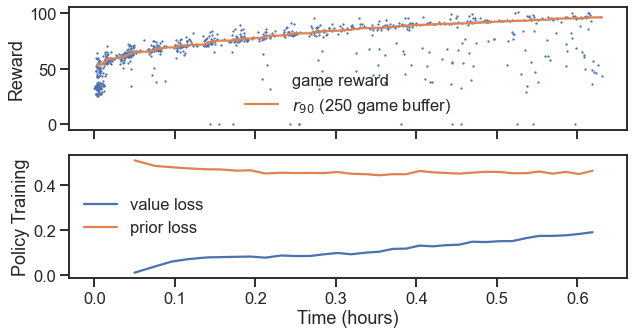

In [10]:
# Load the game buffer
with psycopg2.connect(**dbparams) as conn:
    df = pd.read_sql_query("select * from {}_game where experiment_id = %s".format(
        config.sql_basename), conn, params=(config.experiment_id,))
    
# Load the policy training history
log = pd.read_csv(os.path.join(config.checkpoint_filepath, 'log.csv'))
log['time'] = pd.to_datetime(log.time)

df['time_hours'] = (df.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)
log['time_hours'] = (log.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)

df = df.sort_values('time_hours')

fig, axs = plt.subplots(sharex=True, nrows=2, figsize=(10, 5))

axs[0].plot(df.time_hours, df.real_reward, '.', ms=2.5, label='game reward')
axs[0].plot(df.time_hours, df.real_reward.rolling(250, min_periods=50).quantile(.9), label='$r_{90}$ (250 game buffer)')

axs[1].plot(log.time_hours, log.policy_wrapper_loss, label='value loss')
axs[1].plot(log.time_hours, log.policy_wrapper_1_loss, label='prior loss')

axs[1].legend()
axs[0].legend()

axs[0].set_ylabel('Reward')
axs[1].set_ylabel('Policy Training')
axs[1].set_xlabel('Time (hours)')

In [11]:
df.tail(20)

,id,time,experiment_id,gameid,real_reward,final_smiles,time_hours
783,4855,2020-10-22 10:11:35.313042,03_15_atom_max,38c50e09,96.952970,CCC1=C(C)[CH]C(=O)N(O)[C@H]1C(=O)O,0.608987
784,4856,2020-10-22 10:11:38.592255,03_15_atom_max,ea109d76,49.742530,C[C]=C(C)OC(=O)N=C(O)C(C)(C)OC,0.609898
785,4857,2020-10-22 10:11:40.891569,03_15_atom_max,b7f478e1,96.752495,COC(C(=CC#N)OC(=O)O)=C([NH])O,0.610537
786,4858,2020-10-22 10:11:42.893708,03_15_atom_max,0f8389e6,97.649450,CN(C)[C@H](C([O])=O)N(C)O,0.611093
787,4859,2020-10-22 10:11:43.211870,03_15_atom_max,effed4e9,95.992540,C=C(C1=C(C#N)N2C[CH]C=C12)C(C)C,0.611181
788,4860,2020-10-22 10:11:44.414429,03_15_atom_max,05309f28,97.001015,CC([O])=C(OC(C)(O)O)C(N)=C(C)O,0.611515
789,4861,2020-10-22 10:11:49.530302,03_15_atom_max,e28fd78f,99.986840,[CH2]C1=C(C(=O)C(=O)N(N)N)C(C)=C(C)C1,0.612936
790,4862,2020-10-22 10:11:50.802605,03_15_atom_max,a0d48523,85.519905,CCOO[C](C(=O)CCS)C(=O)C(=O)O,0.613290
791,4863,2020-10-22 10:11:53.582329,03_15_atom_max,43caea01,99.997370,COC(C)(OC)C(N)(N)C([O])=O,0.614062
792,4864,2020-10-22 10:11:55.656324,03_15_atom_max,22b771af,96.268400,COC(=NC1=C([O])N1)C(OC)=C(C)OC,0.614638


In [6]:
# Load the reward buffer to plot the optimal molecules
with psycopg2.connect(**dbparams) as conn:
    rew_df = pd.read_sql_query("select * from {}_reward".format(config.sql_basename), conn)

rew_df.shape

(387842, 7)

In [7]:
rew_df.sort_values('real_reward', ascending=False).head(10)

,smiles,time,real_reward,atom_type,buried_vol,max_spin,atom_index
334256,CCC(C)(C)C(C1=NOC1=O)=C(C)[CH]O,2020-10-22 09:49:45.833960,108.04072,C,72.705284,0.293291,5
264395,CC(=O)[C](C(C)=C(O)S)N(C)C(C)(C)C,2020-10-21 15:31:16.225068,107.91592,C,72.479330,0.291268,3
231326,[CH2]C(C)=C(C(C)C)[C@H](C(C)=O)C(=O)C#N,2020-10-21 14:49:10.282008,107.40432,C,73.138756,0.314689,3
261715,C=C(C)C(=C)C(=C(N)OC)C(N)=C([O])O,2020-10-21 15:19:18.544748,107.02061,C,68.010030,0.219789,5
264788,[CH2]C(C)=C(CC)C(C=C)=C(OC)C(=C)C,2020-10-21 15:36:00.362094,106.45212,C,67.557150,0.222101,9
264361,CCN(C)[C](C(C)=O)C(C)=C(C)NNC,2020-10-21 15:30:59.087115,106.30983,C,69.274890,0.259301,4
207005,CC(=O)CN1CN(C)[C]=C1C(C)(C)N=O,2020-10-21 14:39:21.146962,106.13913,C,67.811870,0.233455,9
265789,C=C(C)[C](C(=O)C(=C)C)N(C)C(C)(C)O,2020-10-21 15:47:14.978660,105.93117,C,71.060750,0.302592,3
266043,CCC([C](C(C)=O)N(CC)CC)=C(O)S,2020-10-21 15:49:46.209473,105.81415,C,70.641510,0.296547,3
267980,C[N]C(CCO)=C1C(O)=C(O)CC1(O)O,2020-10-21 16:12:00.602143,105.66926,C,68.597610,0.258567,6


In [ ]:
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    orig_costs = np.array(costs)
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return orig_costs[is_efficient_mask]
    else:
        return is_efficient

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13,3), sharex=True, sharey=True)

optimal = []
for ax, atom in zip(axs, ['C', 'N', 'O', 'S']):
    
    vals = rew_df[rew_df.atom_type == atom][['max_spin', 'buried_vol']].dropna()
    vals['buried_vol'] *= -1
    pareto_index = is_pareto_efficient(vals.values, return_mask=False)
    pareto_points = vals.iloc[pareto_index]
    optimal += [vals.iloc[pareto_index].index]
    
    ax.plot(rew_df[rew_df.atom_type == atom]['max_spin'],
            rew_df[rew_df.atom_type == atom]['buried_vol'], '.', ms=1, alpha=.1)
    
    ax.plot(pareto_points['max_spin'], -pareto_points['buried_vol'], '.', label='pareto optimal')
    
    ax.set_title(atom)

    
axs[1].set_xlabel('Max Fractional Spin')
axs[0].set_ylabel('Buried volume\nat max spin')

axs[-1].legend(loc='upper left', fontsize=12)
sns.despine()    

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
from IPython.display import SVG

In [ ]:
to_plot = rew_df.reindex(pd.Series(optimal[0]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
to_plot = rew_df.reindex(pd.Series(optimal[1]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
to_plot = rew_df.reindex(pd.Series(optimal[2]))[rew_df.reindex(pd.Series(optimal[2])).buried_vol > 45].sample(5)
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
to_plot = rew_df.reindex(pd.Series(optimal[3]).sample(5))
d2d = rdMolDraw2D.MolDraw2DSVG(1000, 200, 200, 200)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [ ]:
to_plot = rew_df.reindex(np.concatenate(optimal)).sample(25)
d2d = rdMolDraw2D.MolDraw2DSVG(150*5, 150*5, 150, 150)
opts = d2d.drawOptions()
d2d.DrawMolecules([Chem.MolFromSmiles(row.smiles) for _, row in to_plot.iterrows()],
                  highlightAtoms=[(int(row.atom_index),) for _, row in to_plot.iterrows()])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

looks like atom ordering isn't consistent

TODO: 
* Maybe do ranked reward on an atom-by-atom basis?
* http://rdkit.blogspot.com/2020/01/similarity-maps-with-new-drawing-code.html
* add large pieces at once? (benzyl ring, etc)